##### kmeans 1sr study


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 5)

import warnings
warnings.simplefilter('ignore')
from sklearn.decomposition import PCA

from kneed import KneeLocator
from sklearn.cluster import KMeans,DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch

In [104]:
df=pd.read_csv('cp4km_sensetr.csv')
df=df.drop(['Unnamed: 0'], axis=1)
#'total_traits','num_sales'
df

,preventa_usd,cryptopunkID,venta_usd,rarity_rank,Messy Hair,Mohawk Dark,Medical Mask,Pipe,Mustache,Horned Rim Glasses,...,tipus_Male,tipus_Zombie,skin_Albino-skinned,skin_Alien-skinned,skin_Ape-skinned,skin_Dark-skinned,skin_Light-skinned,skin_Mid-skinned,skin_Zombie-skinned,rentabilidad_usd
0,0.000099,0,0.002894,0.201005,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.002795
1,0.001325,1,0.037231,0.437186,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0.035906
2,0.000090,14,0.000240,0.015075,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.000150
3,0.000000,33,0.000108,0.763819,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.000108
4,0.011003,53,0.443711,0.281407,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.432708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,0.000000,9982,0.493358,0.804020,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.493358
6304,0.000000,9989,0.000144,0.015075,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.000144
6305,0.011563,9990,0.000000,0.919598,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,-0.011563
6306,0.005414,9997,0.174100,0.045226,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.168685


In [105]:
colslist=['cryptopunkID','preventa_usd','venta_usd','rarity_rank','total_traits','num_sales','tipus_Alien','tipus_Ape','tipus_Female','tipus_Male','tipus_Zombie','skin_Albino-skinned','skin_Alien-skinned','skin_Ape-skinned','skin_Dark-skinned','skin_Light-skinned','skin_Mid-skinned','skin_Zombie-skinned','rentabilidad_usd']
df1=df[colslist]
df1[colslist[1:]]

,preventa_usd,venta_usd,rarity_rank,total_traits,num_sales,tipus_Alien,tipus_Ape,tipus_Female,tipus_Male,tipus_Zombie,skin_Albino-skinned,skin_Alien-skinned,skin_Ape-skinned,skin_Dark-skinned,skin_Light-skinned,skin_Mid-skinned,skin_Zombie-skinned,rentabilidad_usd
0,0.000099,0.002894,0.201005,0.444444,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0.002795
1,0.001325,0.037231,0.437186,0.222222,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0.035906
2,0.000090,0.000240,0.015075,0.333333,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0.000150
3,0.000000,0.000108,0.763819,0.111111,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0.000108
4,0.011003,0.443711,0.281407,0.222222,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0.432708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,0.000000,0.493358,0.804020,0.444444,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0.493358
6304,0.000000,0.000144,0.015075,0.333333,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0.000144
6305,0.011563,0.000000,0.919598,0.222222,0.0,0,0,0,1,0,1,0,0,0,0,0,0,-0.011563
6306,0.005414,0.174100,0.045226,0.333333,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0.168685


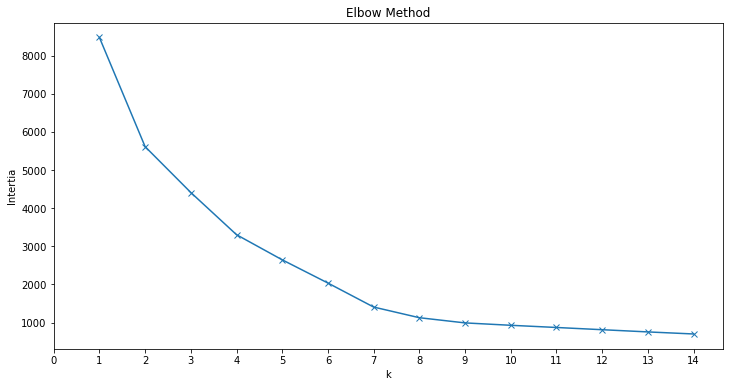

In [106]:
intertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df1[colslist[1:]])
    intertia.append(km.inertia_)
plt.plot(K, intertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

In [107]:
colze = KneeLocator(range(1, 15), intertia, curve="convex", direction="decreasing")
print('Ideal cluster number is:', colze.elbow)

Ideal cluster number is: 7


In [108]:
# Perform K-means algorithm

km = KMeans(n_clusters=7,random_state = 22, n_init= km.n_iter_, init='random')
kfit=km.fit(df1[colslist[1:]])
y_kmeans = km.predict(df1[colslist[1:]])

centroids = km.cluster_centers_
C = km.cluster_centers_


In [109]:
#Appending the identified clusters to the original data

pca = PCA(n_components=2)
ppcc=pca.fit_transform(df1[colslist[1:]])

principalDf = pd.DataFrame(data = ppcc, columns = ['component1', 'component2'])

principalDf['Cluster'] = y_kmeans
principalDf.head()

,component1,component2,Cluster
0,0.950093,0.718878,6
1,-0.474658,-0.082460,1
2,0.973137,-0.122652,5
3,-0.553879,-0.643820,4
4,0.901773,-0.693379,3


In [110]:
from sklearn.decomposition import PCA
expl=pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:30]))

[0.34087328 0.22683089]
suma: 0.5677041655579032


In [111]:
principalDf['Cluster'].value_counts()

4    1254
0    1243
1    1155
6     962
3     654
5     653
2     387
Name: Cluster, dtype: int64

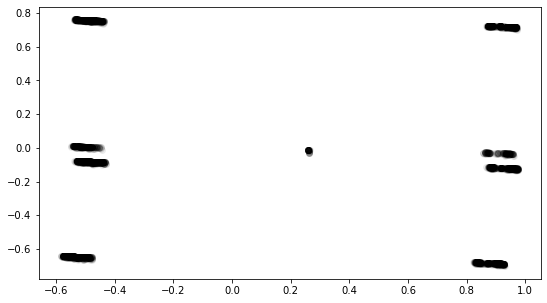

In [10]:
plt.scatter(principalDf['component1'], principalDf['component2'], alpha=.05, color='black')

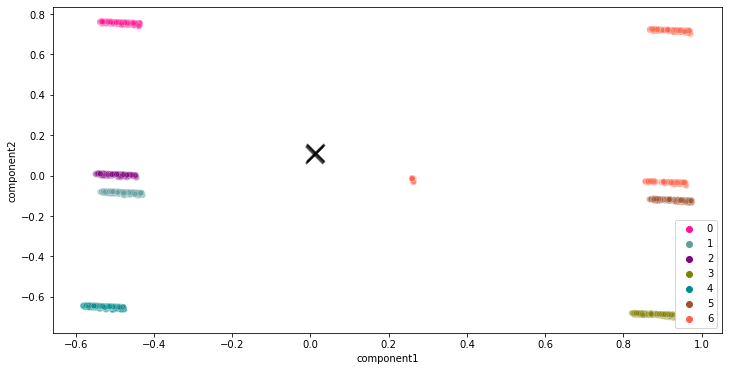

In [11]:
plt.rcParams['figure.figsize'] = (12, 6)

# Predicting the clusters
labels = km.predict(df1[colslist[1:]])

colores=['deeppink','cadetblue','purple','olive','darkcyan','sienna','tomato']
#,'deeppink','sienna','tomato','darkcyan','cadetblue','purple','olive'
asignar=[]
for row in labels:
    asignar.append(colores[row])

sns.scatterplot(data=principalDf, x="component1", y="component2", hue= y_kmeans, palette = colores, alpha = 0.3)
centers = km.cluster_centers_# Plot centers

plt.scatter(centers[:, 0], centers[:, 1],color='k', s=300, marker="x", alpha = 0.5)
plt.savefig("kmeans.png", dpi=200)

In [12]:
from sklearn import metrics
labels = km.labels_
sil=metrics.silhouette_score(df1[colslist[1:]], labels, metric = 'euclidean')
if sil < 0:
    print('silhouette:',round(sil,4),'-- sample2 have been assigned to the wrong cluster')
elif sil < 0.5:
    print('silhouette:',round(sil,4),'-- overlaping samples')
else:
    print('silhouette:',round(sil,4),'-- good clustering')

silhouette: 0.6323 -- good clustering


##### check metrics

In [13]:
df2=pd.read_csv('crpyptopunks4kmeans_pre.csv')
df2=df2.drop(['Unnamed: 0'], axis=1)
df2

,venta_usd,rarity_rank,Messy Hair,Mohawk Dark,Medical Mask,Pipe,Mustache,Horned Rim Glasses,Tiara,Cap Forward,...,tipus_Female,tipus_Male,tipus_Zombie,skin_Albino-skinned,skin_Alien-skinned,skin_Ape-skinned,skin_Dark-skinned,skin_Light-skinned,skin_Mid-skinned,skin_Zombie-skinned
0,2822.0,2023,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,36305.0,4352,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,234.0,155,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,105.0,7635,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,432676.0,2825,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,481088.0,8012,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6304,140.0,186,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6305,0.0,9186,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
6306,169770.0,498,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [14]:
dfjoin=pd.concat([df['cryptopunkID'],df2,principalDf['Cluster']], axis=1)

In [15]:
cols=['Cluster','cryptopunkID','rarity_rank','total_traits','num_sales','tipus_Alien','tipus_Ape','tipus_Female','tipus_Male','tipus_Zombie','skin_Albino-skinned','skin_Alien-skinned','skin_Ape-skinned','skin_Dark-skinned','skin_Light-skinned','skin_Mid-skinned','skin_Zombie-skinned','venta_usd']
dfanova=dfjoin[cols]
dfanova

,Cluster,cryptopunkID,rarity_rank,total_traits,num_sales,tipus_Alien,tipus_Ape,tipus_Female,tipus_Male,tipus_Zombie,skin_Albino-skinned,skin_Alien-skinned,skin_Ape-skinned,skin_Dark-skinned,skin_Light-skinned,skin_Mid-skinned,skin_Zombie-skinned,venta_usd
0,6,0,2023,4,3,0,0,1,0,0,0,0,0,0,0,1,0,2822.0
1,1,1,4352,2,3,0,0,0,1,0,0,0,0,1,0,0,0,36305.0
2,5,14,155,3,3,0,0,1,0,0,0,0,0,1,0,0,0,234.0
3,4,33,7635,1,1,0,0,0,1,0,0,0,0,0,1,0,0,105.0
4,3,53,2825,2,3,0,0,1,0,0,0,0,0,0,1,0,0,432676.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,3,9982,8012,4,1,0,0,1,0,0,0,0,0,0,1,0,0,481088.0
6304,5,9989,186,3,1,0,0,1,0,0,0,0,0,1,0,0,0,140.0
6305,2,9990,9186,2,2,0,0,0,1,0,1,0,0,0,0,0,0,0.0
6306,6,9997,498,3,2,0,0,0,0,1,0,0,0,0,0,0,1,169770.0


In [16]:
dfsales=pd.read_csv('crypto4anova.csv')
dfsales=dfsales[['cryptopunkID','preventa_usd','rentabilidad_usd']]

In [17]:
dfanova_new=pd.merge(dfanova,dfsales, on='cryptopunkID')
dfanova_new.to_csv('dfanova_new.csv')

In [18]:
dfanova_new

,Cluster,cryptopunkID,rarity_rank,total_traits,num_sales,tipus_Alien,tipus_Ape,tipus_Female,tipus_Male,tipus_Zombie,skin_Albino-skinned,skin_Alien-skinned,skin_Ape-skinned,skin_Dark-skinned,skin_Light-skinned,skin_Mid-skinned,skin_Zombie-skinned,venta_usd,preventa_usd,rentabilidad_usd
0,6,0,2023,4,3,0,0,1,0,0,0,0,0,0,0,1,0,2822.0,386.0,2436.0
1,1,1,4352,2,3,0,0,0,1,0,0,0,0,1,0,0,0,36305.0,5155.0,31150.0
2,5,14,155,3,3,0,0,1,0,0,0,0,0,1,0,0,0,234.0,351.0,-117.0
3,4,33,7635,1,1,0,0,0,1,0,0,0,0,0,1,0,0,105.0,0.0,105.0
4,3,53,2825,2,3,0,0,1,0,0,0,0,0,0,1,0,0,432676.0,42803.0,389873.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,6,9980,1159,4,6,0,0,1,0,0,0,0,0,0,0,1,0,182376.0,84964.0,97412.0
6159,3,9982,8012,4,1,0,0,1,0,0,0,0,0,0,1,0,0,481088.0,0.0,481088.0
6160,5,9989,186,3,1,0,0,1,0,0,0,0,0,1,0,0,0,140.0,0.0,140.0
6161,6,9997,498,3,2,0,0,0,0,1,0,0,0,0,0,0,1,169770.0,21062.0,148708.0


In [19]:
dfanova_new.groupby(['Cluster'])['rentabilidad_usd'].median()

Cluster
0    17282.0
1    16026.0
2    17666.0
3    24716.0
4    15071.5
5    17716.0
6    17743.5
Name: rentabilidad_usd, dtype: float64

In [20]:
dfjoin.groupby(['Cluster'])['venta_usd'].max()

Cluster
0    970225.0
1    941194.0
2    870339.0
3    920876.0
4    974064.0
5    716486.0
6    975130.0
Name: venta_usd, dtype: float64

In [21]:
dfanova_new.groupby(['Cluster'])['venta_usd'].median()

Cluster
0    44981.0
1    48372.0
2    51217.0
3    54823.0
4    44924.0
5    49422.0
6    48405.5
Name: venta_usd, dtype: float64

In [22]:
dfcluster=dfjoin.groupby(['Cluster']).sum()

In [112]:
#['venta_usd', 'rarity_rank', 'total_traits', 'num_sales', 
#              'tipus_Alien', 'tipus_Ape', 'tipus_Female',
# 'tipus_Male', 'tipus_Zombie', 'skin_Albino-skinned', 'skin_Alien-skinned', 'skin_Ape-skinned',
# 'skin_Dark-skinned', 'skin_Light-skinned', 'skin_Mid-skinned', 'skin_Zombie-skinned']
clustersums=['tipus_Alien', 'tipus_Ape', 'tipus_Female', 
 'tipus_Male', 'tipus_Zombie', 'skin_Albino-skinned', 
 'skin_Dark-skinned', 'skin_Light-skinned', 'skin_Mid-skinned']

dfcluster[clustersums].head(7)

,tipus_Alien,tipus_Ape,tipus_Female,tipus_Male,tipus_Zombie,skin_Albino-skinned,skin_Dark-skinned,skin_Light-skinned,skin_Mid-skinned
Cluster,,,,,,,,,
0,0,0,0,1243,0,0,0,0,1243
1,0,0,0,1155,0,0,1155,0,0
2,0,0,0,387,0,387,0,0,0
3,0,0,654,0,0,0,0,654,0
4,0,0,0,1254,0,0,0,1254,0
5,0,0,653,0,0,0,653,0,0
6,5,13,909,0,35,215,0,0,694


Cluster 0: Número de Cryptopunks: 653, all female, all Dark-skinned
Cluster 1: Número de Cryptopunks: 387, all male, Albino-skinned
Cluster 2: Número de Cryptopunks: 1254, all male, Light-skinned
Cluster 3: Número de Cryptopunks: 694, all female, Mid-skinned
Cluster 4: Número de Cryptopunks: 1155, all male, Dark-skinned
Cluster 5: Número de Cryptopunks: 1243, all male, Mid-skinned
Cluster 6: Número de Cryptopunks: 922, alien, ape, female (Albino-skinned only) and zombie, 

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

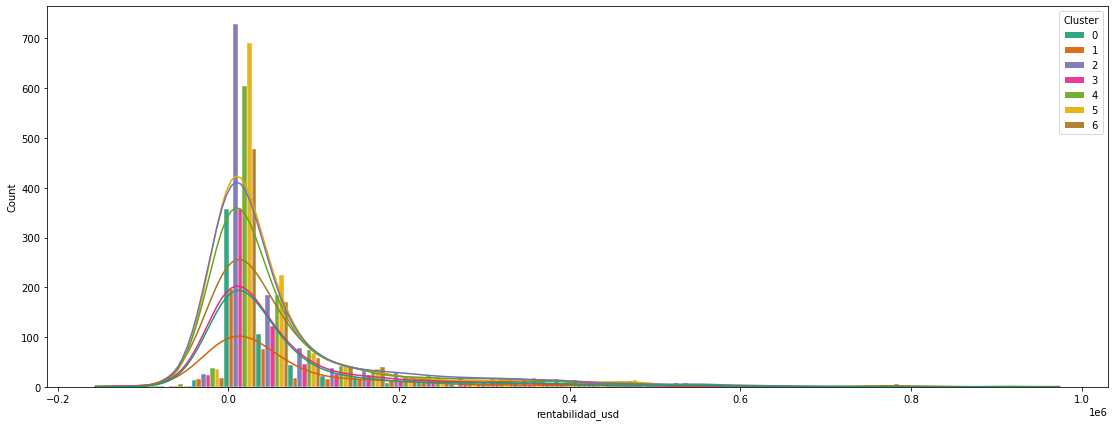

In [102]:
fig = plt.figure(figsize = (19,7))
sns.histplot(x='rentabilidad_usd', data=dfanova_new, kde=True , edgecolor="w", alpha=.9, hue='Cluster',
             bins=30, palette="Dark2", multiple='dodge')
plt.savefig("rentabil.png", dpi=200)

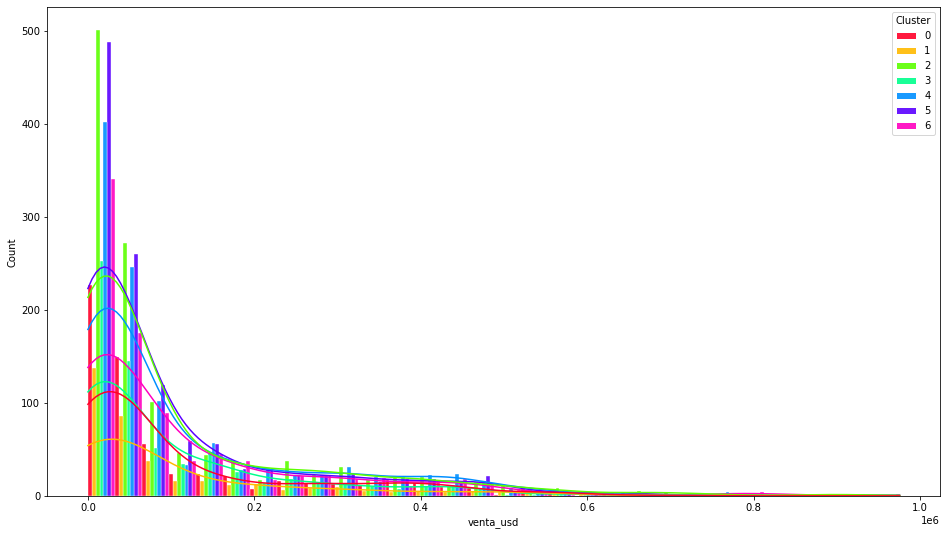

In [93]:
sns.histplot(x='venta_usd', data=dfanova_new, kde=True , edgecolor="w", alpha=.9, hue='Cluster',
             bins=30, palette="gist_rainbow", multiple='dodge')

In [32]:
dfanova_new.groupby(['Cluster'])['rentabilidad_usd'].min()

Cluster
0   -138938.0
1   -155524.0
2    -38250.0
3    -62209.0
4    -90836.0
5    -59635.0
6   -155577.0
Name: rentabilidad_usd, dtype: float64

In [139]:
dfanova_new[dfanova_new['tipus_Ape'] == 1]

,Cluster,cryptopunkID,rarity_rank,total_traits,num_sales,tipus_Alien,tipus_Ape,tipus_Female,tipus_Male,tipus_Zombie,skin_Albino-skinned,skin_Alien-skinned,skin_Ape-skinned,skin_Dark-skinned,skin_Light-skinned,skin_Mid-skinned,skin_Zombie-skinned,venta_usd,preventa_usd,rentabilidad_usd
1067,6,2386,49,2,3,0,1,0,0,0,0,0,1,0,0,0,0,15313.0,5914.0,9399.0
1289,6,2711,37,3,1,0,1,0,0,0,0,0,1,0,0,0,0,276.0,0.0,276.0
1443,6,2924,38,1,3,0,1,0,0,0,0,0,1,0,0,0,0,71403.0,1438.0,69965.0
2349,6,4178,40,1,2,0,1,0,0,0,0,0,1,0,0,0,0,5914.0,1928.0,3986.0
3038,6,5314,41,2,2,0,1,0,0,0,0,0,1,0,0,0,0,54978.0,6305.0,48673.0
3358,6,5795,35,2,1,0,1,0,0,0,0,0,1,0,0,0,0,2212.0,0.0,2212.0
3622,6,6145,48,3,1,0,1,0,0,0,0,0,1,0,0,0,0,2174.0,0.0,2174.0
4124,6,6915,46,3,1,0,1,0,0,0,0,0,1,0,0,0,0,2447.0,0.0,2447.0
4293,6,7191,51,3,1,0,1,0,0,0,0,0,1,0,0,0,0,2046.0,0.0,2046.0
4977,6,8219,44,2,1,0,1,0,0,0,0,0,1,0,0,0,0,150275.0,0.0,150275.0


In [134]:
dftest=dfanova_new[dfanova_new['Cluster']==0]
dftest=dftest[dftest['rentabilidad_usd']<0]
len(dftest)

88

In [135]:
dftest['rentabilidad_usd'].min()

-138938.0

cluster 6: no losts: 64, median of 5935U$, mean of 18982, no wins 873  --> old 6 --> 6,65% (up to 155,577) -48% rentab.
cluster 5: no losts: 43, median of 2209$, mean of 9323, no wins 582
cluster 4: no losts: 69, median of 1819$, mean of 11042, no wins 1166
cluster 3: no losts: 40, median of 1874$, mean of 8638, no wins 600
cluster 2: no losts: 26, median of 9569$, mean of 11710, no wins 354   --> old 1 --> losts 6% (38,250) -39%
cluster 1: no losts: 88, median of 5239$, mean of 17572, no wins 1015
cluster 0: no losts: 88, median of 3355$, mean of 15387, no wins 1124